In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [16]:
# Load the data
dataset = pd.read_csv("C:\\Users\\varroju\\OneDrive - DXC Production\\Documents\My\\My Learning\\DXC - Data Science\\Regression\\Python Practice\\Regression Analysis\\Regression Analysis for Business Managers in Python and R templates\\Logistic Regression\\Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Minimized columns    # RowNumber	CustomerId	Surname	 are removed.
dataset = dataset.iloc[:,3:]
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
# Look at data structure
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
# Transform objects into dummy variables - 
dataset = pd.get_dummies(dataset, drop_first= True)
dataset
# In objects(text), first values 'France' in Geography& 'Female' in Gender are omitted.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [7]:
# Summmary statistics
pd.set_option('display.max_columns', None)
dataset.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  Surname_Abbie  Surname_Abbott  \
count     10000.000000  10000.000000     10000.0000    10000.000000   
mean     100090.239881      0.203700         0.0001        0.000400   
std       57510.492818      0.402769         0.0100        0.019997   
min          11.580000      0.000000         0.0000        0.000000   
25%       51002.110000      0.000000         0.0000        0.000000   
50%      100193.915000      0.000000         0.0000        0.000000   
75%      149388.247500      0.000000         0.0000        0.000000   
max      199992.480000      1.000000         1.0000        1.000000   

       Surname_Abdullah  Surname_Abdulov  Surname_Abel  Surname_Abernathy  \
count        10000.0000     10000.000000    10000.0000       10000.000000   
mean             0.0001         0.000200        0.0001           0.000200   
std              0.0100         0.014141        0.0100           0.014141   
min              0.0000         0.000000        0.0000           0.000000   
25%              0.0000         0.000000        0.0000           0.000000   
50%              0.0000         0.000000        0.0000           0.000000   
75%              0.0000         0.000000        0.0000           0.000000   
max              1.0000         1.000000        1.0000           1.000000   

       Surname_Abramov  Surname_Abramova  Surname_Abramovich  \
count       10000.0000      10000.000000        10000.000000   
mean            0.0001          0.000200            0.000500   
std             0.0100          0.014141            0.022356   
min             0.0000          0.000000            0.000000   
25%             0.0000          0.000000            0.000000   
50%             0.0000          0.000000            0.000000   
75%             0.0000          0.000000            0.000000   
max             1.0000          1.000000            1.000000   

       Surname_Abramowitz  Surname_Abrego  Surname_Abron  Surname_Achebe  \
count        10000.000000      10000.0000     10000.0000    10000.000000   
mean             0.000200          0.0001         0.0001        0.000300   
std              0.014141          0.0100         0.0100        0.017319   
min              0.000000          0.0000         0.0000        0.000000   
25%              0.000000          0.0000         0.0000        0.000000   
50%              0.000000          0.0000         0.0000        0.000000   
75%              0.000000          0.0000         0.0000        0.000000   
max              1.000000          1.0000         1.0000        1.000000   

       Surname_Adams  Surname_Adamson  Surname_Afamefula  Surname_Afamefuna  \
count   10000.0000

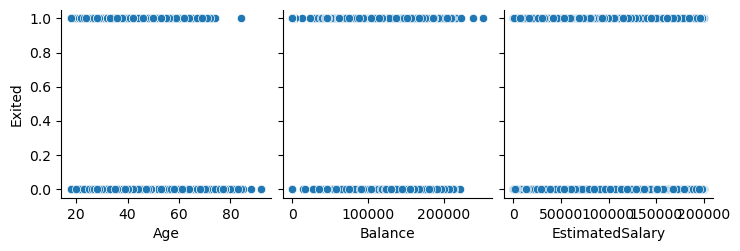

In [20]:
# Outlier detection
sns.pairplot(data= dataset, 
            y_vars = ['Exited'],
            x_vars = ['Age','Balance','EstimatedSalary'])

In [21]:
# Removing outliers
dataset = dataset[dataset['Age']<85]
dataset = dataset[dataset['Balance'] < 225000]
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [23]:
# Transfor Estimated salary into log form
dataset['EstmatedSalary'] = np.log(dataset['EstimatedSalary'])
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,EstmatedSalary
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,11.526324
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,11.631087
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,11.643353
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,11.449204
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,11.278267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,11.474919
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,11.529780
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,10.647460
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,11.439155


<Axes: >

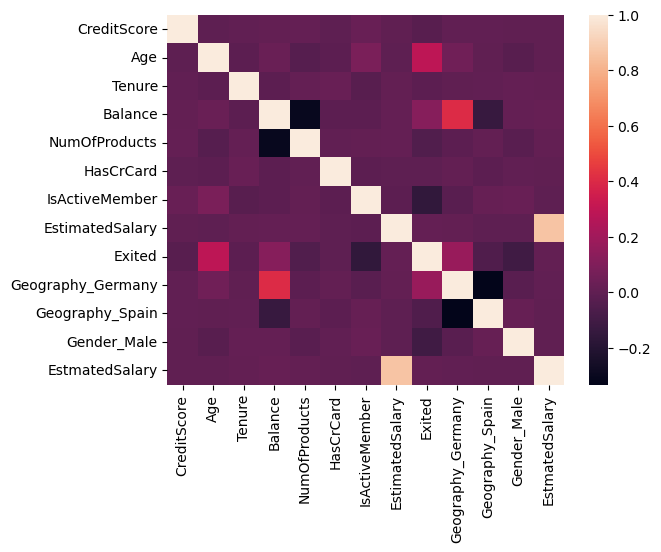

In [105]:
# Correlation Matrix
corr = dataset.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)

In [106]:
# Isolated x and y variables
y = dataset.loc[:, 'Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9994, dtype: int64

In [107]:
x = dataset.drop(['Exited'], axis =1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,EstmatedSalary
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,11.526324
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,11.631087
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,11.643353
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,11.449204
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,11.278267
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,11.474919
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,11.529780
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0,10.647460
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,11.439155


In [108]:
x = sm.add_constant(x)
x

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,EstmatedSalary
0,1.0,619,42,2,0.00,1,1,1,101348.88,0,0,0,11.526324
1,1.0,608,41,1,83807.86,1,0,1,112542.58,0,1,0,11.631087
2,1.0,502,42,8,159660.80,3,1,0,113931.57,0,0,0,11.643353
3,1.0,699,39,1,0.00,2,0,0,93826.63,0,0,0,11.449204
4,1.0,850,43,2,125510.82,1,1,1,79084.10,0,1,0,11.278267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,771,39,5,0.00,2,1,0,96270.64,0,0,1,11.474919
9996,1.0,516,35,10,57369.61,1,1,1,101699.77,0,0,1,11.529780
9997,1.0,709,36,7,0.00,1,0,1,42085.58,0,0,0,10.647460
9998,1.0,772,42,3,75075.31,2,1,0,92888.52,1,0,1,11.439155


In [109]:
# Split dataset into training set and test set 
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                random_state=1502)


In [110]:
x_Test

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,EstmatedSalary
9418,1.0,639,27,2,0.00,1,1,1,82938.99,0,1,0,11.325861
5703,1.0,516,42,8,56228.25,1,1,0,46857.52,0,0,0,10.754867
3336,1.0,690,36,10,0.00,2,1,0,55902.93,0,1,1,10.931372
2909,1.0,594,38,6,63176.44,2,1,1,14466.08,1,0,1,9.579562
5188,1.0,663,30,4,0.00,3,1,0,101371.05,0,1,1,11.526543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,1.0,537,48,4,131834.80,1,1,0,166476.95,1,0,1,12.022612
8556,1.0,629,41,10,150148.51,1,0,0,6936.27,0,1,1,8.844519
1894,1.0,535,49,7,115309.75,1,1,0,111421.77,0,1,0,11.621078
7060,1.0,712,32,1,0.00,2,1,0,1703.58,0,0,0,7.440487


In [77]:
y_Train

9858    1
9643    0
1826    0
6502    0
576     0
       ..
1892    0
8233    0
2312    1
5346    0
8760    0
Name: Exited, Length: 7995, dtype: int64

In [78]:
y_Test

5101    0
4890    0
4168    0
792     0
5110    0
       ..
3664    0
6795    0
2340    1
5187    1
7691    0
Name: Exited, Length: 1999, dtype: int64

In [111]:
# Logistic Regression
model = sm.Logit(y_Train,x_Train).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.422683
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7995
Model:                          Logit   Df Residuals:                     7982
Method:                           MLE   Df Model:                           12
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.1582
Time:                        10:05:51   Log-Likelihood:                -3379.4
converged:                       True   LL-Null:                       -4014.5
Covariance Type:            nonrobust   LLR p-value:                1.200e-264
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0786      0.650     -4.737      0.000      -4.352      -1.805
CreditScore          -0.0008      0.000     -2.545      0.011      -0.001      -0.000
Age                   0.0744      0.003     25.620      0.000       0.069       0.080
Tenure               -0.0139      0.011     -1.314      0.189      -0.035       0.007
Balance            2.702e-06    5.8e-07      4.656      0.000    1.56e-06    3.84e-06
NumOfProducts        -0.0950      0.053     -1.793      0.073      -0.199       0.009
HasCrCard            -0.0433      0.067     -0.649      0.517      -0.174       0.088
IsActiveMember       -1.0801      0.065    -16.596      0.000      -1.208      -0.953
EstimatedSalary    1.451e-06   1.05e-06      1.384      0.166   -6.03e-07    3.51e-06
Geography_Germany     0.8091      0.076     10.618      0.000       0.660       0.958
Geography_Spain       0.0410      0.080      0.515      0.607      -0.115       0.197
Gender_Male          -0.5230      0.061     -8.516      0.000      -0.643      -0.403
EstmatedSalary       -0.0401      0.061     -0.662      0.508      -0.159       0.079
=====================================================================================
"""

In [116]:
# Prediction
predictions = model.predict(x_Test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
# Confusion Matrix
from sklearn.metrics import classification_report
report = classification_report(y_Test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1573
           1       0.60      0.22      0.32       426

    accuracy                           0.80      1999
   macro avg       0.71      0.59      0.60      1999
weighted avg       0.77      0.80      0.76      1999

